# Second pass at EDA
Taking a second pass at EDA, this time working from high level down to specifics.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
starcraft_loc = '../data/interimStarcraft_cleaned.csv'
#using index_col = 0 to drop the uncessary number column added by saving the data from the previous notebook.
starcraft = pd.read_csv(starcraft_loc,index_col = 0)
starcraft.info()
starcraft.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3337 entries, 0 to 3339
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3337 non-null   int64  
 1   LeagueIndex           3337 non-null   int64  
 2   Age                   3337 non-null   int64  
 3   HoursPerWeek          3337 non-null   int64  
 4   TotalHours            3337 non-null   int64  
 5   APM                   3337 non-null   float64
 6   SelectByHotkeys       3337 non-null   float64
 7   AssignToHotkeys       3337 non-null   float64
 8   UniqueHotkeys         3337 non-null   int64  
 9   MinimapAttacks        3337 non-null   float64
 10  MinimapRightClicks    3337 non-null   float64
 11  NumberOfPACs          3337 non-null   float64
 12  GapBetweenPACs        3337 non-null   float64
 13  ActionLatency         3337 non-null   float64
 14  ActionsInPAC          3337 non-null   float64
 15  TotalMapExplored     

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


# Data Story
Our target is the League Index as thats the thing we want to change. We being with a univariate plot, to see how our League Index is distributed.

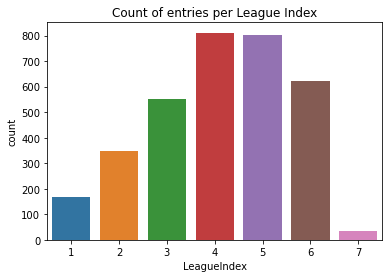

In [8]:
sns.countplot(x='LeagueIndex',data=starcraft)
plt.title('Count of entries per League Index')
plt.show()

We can see that we have less data about players at either tail of our League Indexes and noticiably, very few responses from players in the highest League Index. It is unclear if this is similar to the distribution of total players in these leagues, or an effect of our data collection process.

We generate our bivariate charts, with Leage Index on the X-axis, to see what features increase or decrease as league increases.

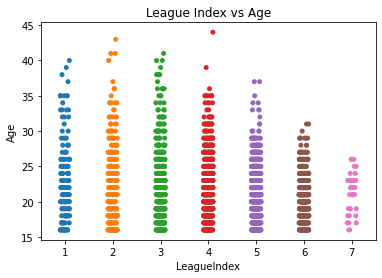

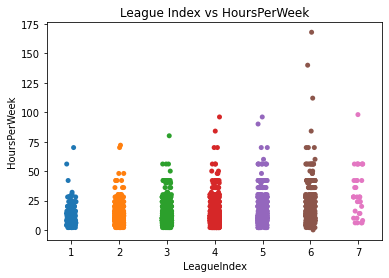

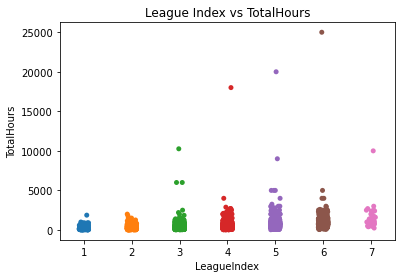

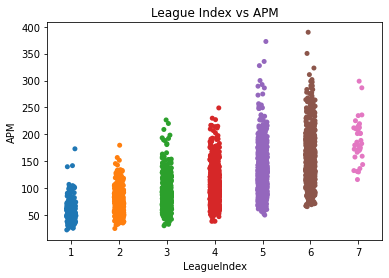

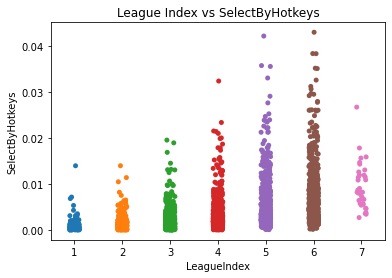

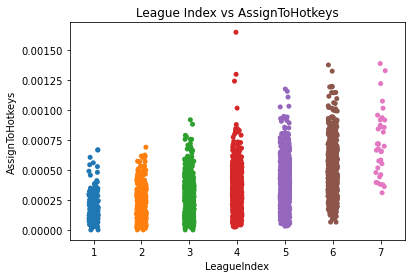

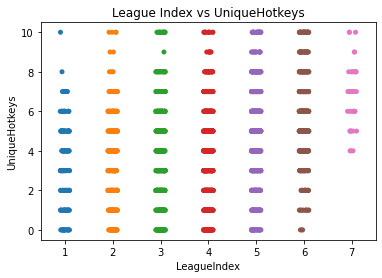

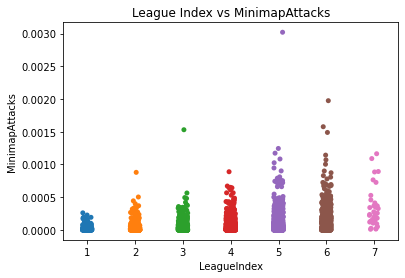

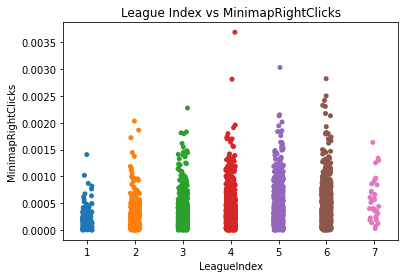

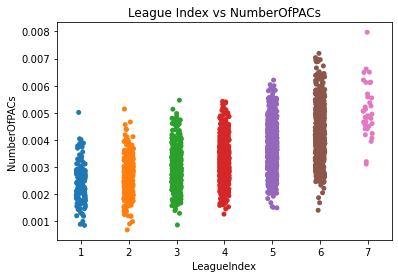

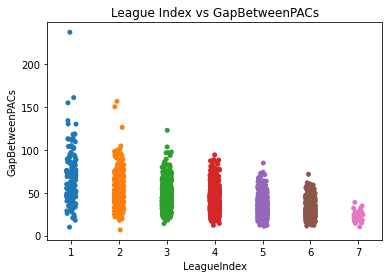

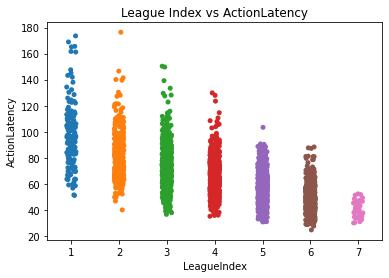

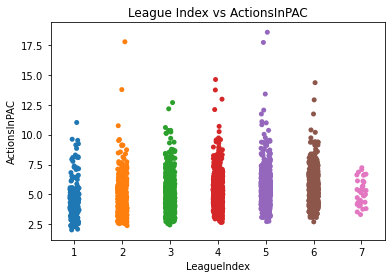

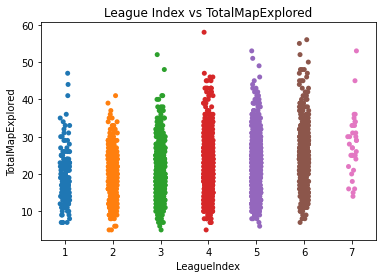

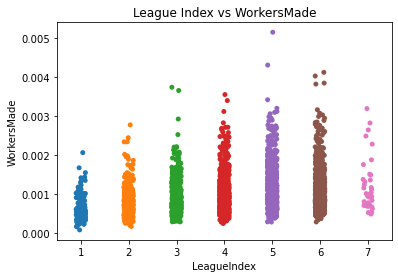

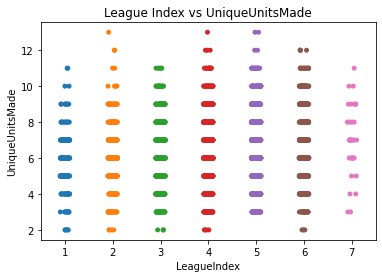

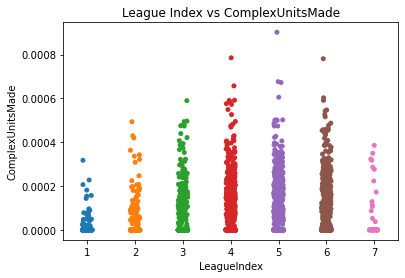

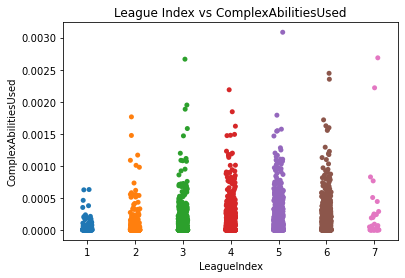

In [11]:
for name in starcraft.columns[2:]:
    sns.stripplot(x='LeagueIndex',y=name,data=starcraft)
    plt.title('League Index vs '+name)
    plt.show()

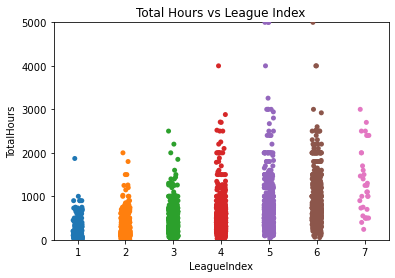

In [16]:
hourplot = sns.stripplot(x='LeagueIndex',y='TotalHours',data=starcraft)
hourplot.set_ylim(0,5000)
plt.title('Total Hours vs League Index')
plt.show()

# Correlation Matrix
here we generate the correlation matrix to see what could possibly contribute to multicollinearity, we also generate a heatmap since they are sometimes easier to parse.

In [6]:
starcraft.corr()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,1.000000,0.024946,0.088563,-0.025356,0.029156,0.075917,0.070282,0.063858,0.081164,0.022438,0.009890,0.035555,-0.065599,-0.042655,0.039465,0.030854,-0.015218,0.029501,-0.018031,0.004076
LeagueIndex,0.024946,1.000000,-0.127381,0.217834,0.270729,0.624701,0.428998,0.487243,0.322383,0.270606,0.206359,0.589180,-0.537475,-0.659923,0.140243,0.230221,0.310380,0.151997,0.171304,0.156146
Age,0.088563,-0.127381,1.000000,-0.184289,-0.032840,-0.210225,-0.130382,-0.104500,0.015198,0.043019,-0.019858,-0.196783,0.111936,0.239962,-0.045797,-0.023956,-0.092158,0.022821,-0.080421,-0.065752
HoursPerWeek,-0.025356,0.217834,-0.184289,1.000000,0.255132,0.246656,0.205494,0.158008,0.070208,0.084178,0.049464,0.174607,-0.133708,-0.188510,0.095200,0.064721,0.050569,0.038586,0.059401,0.074830
TotalHours,0.029156,0.270729,-0.032840,0.255132,1.000000,0.261008,0.219676,0.133030,0.085998,0.134462,0.089879,0.184044,-0.159259,-0.206197,0.080086,0.090821,0.100363,0.053680,0.043454,0.059234
APM,0.075917,0.624701,-0.210225,0.246656,0.261008,1.000000,0.813880,0.533284,0.336292,0.219309,0.306753,0.634857,-0.567698,-0.722258,0.403259,0.238836,0.377826,0.123443,0.162633,0.141877
SelectByHotkeys,0.070282,0.428998,-0.130382,0.205494,0.219676,0.813880,1.000000,0.449216,0.274367,0.133474,0.107658,0.358962,-0.273573,-0.389308,0.166910,0.096515,0.161117,0.028058,0.066300,0.064543
AssignToHotkeys,0.063858,0.487243,-0.104500,0.158008,0.133030,0.533284,0.449216,1.000000,0.402638,0.205779,0.154983,0.453889,-0.377741,-0.461027,0.091327,0.201442,0.196793,0.149608,0.170300,0.169497
UniqueHotkeys,0.081164,0.322383,0.015198,0.070208,0.085998,0.336292,0.274367,0.402638,1.000000,0.151063,0.124556,0.353127,-0.223701,-0.304556,-0.022262,0.267897,0.111276,0.233305,0.122406,0.110057
MinimapAttacks,0.022438,0.270606,0.043019,0.084178,0.134462,0.219309,0.133474,0.205779,0.151063,1.000000,0.224707,0.137988,-0.213425,-0.171671,0.133757,0.164227,0.082345,0.125010,0.052174,0.042214


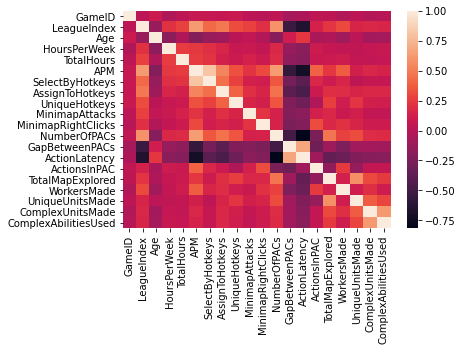

In [7]:
sns.heatmap(data=starcraft.corr())
plt.show()